![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 17 - Boosting</center>
### <center> Gradient Boosting</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/14_Boosting/MainGradientBoosting.ipynb)

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

# np.random.seed(1)

### Generate some data:

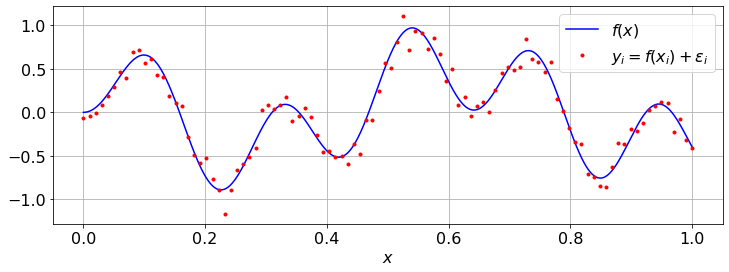

In [3]:
def f(x):
    return np.sin(20*x) * np.sin(10*x**1.1) + x / 10

N  = 100
x  = np.linspace(0, 1, 10001)
vX = np.linspace(0, 1, N)
vY = f(vX) + np.random.randn(N) / 10

plt.figure(figsize=(12,4)); plt.grid(True)
plt.plot(x, f(x), 'b', label='$f(x)$')
plt.plot(vX, vY, '.r', label='$y_i = f(x_i) + \epsilon_i$')
plt.xlabel('$x$')
plt.legend()
plt.show()

### Train a gradient boosting regressor:

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

M    = 100
lr   = 0.1
oGBR = GradientBoostingRegressor(n_estimators=M, learning_rate=lr).fit(vX[:,None], vY)

### Plot:

In [14]:
from ipywidgets import interact, IntSlider, Layout

def PlotGradientBoosting(m):
    y   = 0 * x
    vYi = 0 * vX
    for ii in range(m):
        y   += lr * oGBR.estimators_[ii,0].predict(x[:,None])
        vYi += lr * oGBR.estimators_[ii,0].predict(vX[:,None])

    _, axes = plt.subplots(1, 2, figsize=(22, 4))
    axes[0].grid(True)
    axes[0].plot(x,  f(x), 'b',  label='$f(x)$')
    axes[0].plot(x,  y,    'g',  label='$\hat{f}(x)$')
    axes[0].plot(vX, vY,   '.r', label='$y_i$')
    axes[0].set_xlabel('$x$')
    axes[0].legend()
    axes[0].set_title(f'Gradient boosting: {m} trees')
    
    axes[1].grid(True)   
    axes[1].plot(vX, vY,       '.r', label='$y_i$')
    axes[1].stem(vX, vY - vYi, '.m', label='$\hat{r}_i$', markerfmt='.m', use_line_collection=True)
    axes[1].axhline(y=0, color='k')
    axes[1].set_xlabel('$x$')
    axes[1].legend()
    axes[1].set_title(f'Gradient boosting: Residual')

In [15]:
mSlider = IntSlider(min=1, max=M, step=1, value=1, layout=Layout(width='80%'))
interact(PlotGradientBoosting, m=mSlider)
plt.show()

interactive(children=(IntSlider(value=1, description='m', layout=Layout(width='80%'), min=1), Output()), _dom_…

### Insurance data:
https://www.kaggle.com/mirichoi0218/insurance

In [16]:
dData = pd.read_csv('../../data/Insurance/insurance.csv')
dData

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [18]:
dData.columns = ['Age', 'Sex', 'BMI', '#Children', 'Smoker', 'Region', 'Charges']
dData

,Age,Sex,BMI,#Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
dData = pd.get_dummies(dData, drop_first=True)
lCols = [c for c in dData.columns.tolist() if c is not 'Charges'] + ['Charges']
dData = dData[lCols]
dData

<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-19-3fb9cf9077d0>:2: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  lCols = [c for c in dData.columns.tolist() if c is not 'Charges'] + ['Charges']


,Age,BMI,#Children,Sex_male,Smoker_yes,Region_northwest,Region_southeast,Region_southwest,Charges
0,19,27.900,0,0,1,0,0,1,16884.92400
1,18,33.770,1,1,0,0,1,0,1725.55230
2,28,33.000,3,1,0,0,1,0,4449.46200
3,33,22.705,0,1,0,1,0,0,21984.47061
4,32,28.880,0,1,0,1,0,0,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0,10600.54830
1334,18,31.920,0,0,0,0,0,0,2205.98080
1335,18,36.850,0,0,0,0,1,0,1629.83350
1336,21,25.800,0,0,0,0,0,1,2007.94500


### Compare different regressors:

In [20]:
from sklearn.linear_model    import LinearRegression
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics         import r2_score

In [21]:
dTrainX = dData.drop(columns=['Charges', 'Region_northwest', 'Region_southeast', 'Region_southwest'])
dTrainY = dData.Charges

In [22]:
for P in range(1, 4):
    mTrainPhi = PolynomialFeatures(degree=P, include_bias=False).fit_transform(dTrainX)
    vHatY     = cross_val_predict(LinearRegression(normalize=True), mTrainPhi, dTrainY, cv=KFold(50, shuffle=True))
    print(f'P = {P} (R2 score): {r2_score(dTrainY, vHatY)}')

P = 1 (R2 score): 0.7474131327870428
P = 2 (R2 score): 0.8396389378360843
P = 3 (R2 score): 0.8387354002133531


In [23]:
from sklearn.ensemble import RandomForestRegressor

vHatY = cross_val_predict(RandomForestRegressor(n_estimators=200), dTrainX, dTrainY, cv=KFold(50, shuffle=True))
print(f'Random forest (R2 score): {r2_score(dTrainY, vHatY)}')

Random forest (R2 score): 0.8300683595934216


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

vHatY = cross_val_predict(GradientBoostingRegressor(n_estimators=100, learning_rate=0.05), dTrainX, dTrainY, cv=KFold(50, shuffle=True))
print(f'Gradient boosting (R2 score): {r2_score(dTrainY, vHatY)}')

Gradient boosting (R2 score): 0.8618563345227723
